# Template for Applied Machine Learning

In [15]:
# Importing the libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


# SK Learn Model Building Imports
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

# Data processing imports
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Dimension Reduction Imports
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import KernelPCA

# Regression Imports
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Classification Imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#XGBoost
# Install xgboost following the instructions on this link: http://xgboost.readthedocs.io/en/latest/build.html#
from xgboost import XGBClassifier

# Cross Validation & Grid Search
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Clusterting Imports
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Text Mining Imports
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

# Deep Learning Template
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import ModelCheckpoint , EarlyStopping
# Keras Import For Vision, Can be used for general purpose also
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

## Import Data and Pre-Process

In [ ]:
# Importing the dataset
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 3].values
                
# Take care of missing data
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

# Encoding categorical data
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])

# Create a dummy encoding table
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

# Encode column categorically
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

# Splitting the dataset into a Training Set and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling-Standardizing & Normalizing Features
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Dimension Reduction

In [ ]:
# Applying PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

# Applying LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Applying Kernel PCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)


## Regression Template

In [ ]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]

# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Fitting Polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
lin_reg_2.predict(poly_reg.fit_transform(X))

# Fitting SVR to the dataset
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

# Predicting a new result
y_pred = regressor.predict(6.5)
y_pred = sc_y.inverse_transform(y_pred)

# Fitting Decision Tree Regression to the dataset
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

# Predicting a new result
y_pred = regressor.predict(X)

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X, y)

# Predicting a new result
y_pred = regressor.predict(6.5)

## Classification Template

In [ ]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

# Fitting K-NN to the Training set
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Fitting SVM to the Training set
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Fitting Kernel SVM to the Training set
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Fitting Naive Bayes to the Training set
classifier = GaussianNB()
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Fitting Decision Tree Classification to the Training set
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Fitting XGBoost to the Training set - Check Hyperparameters at XGBoost documentation
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

## Cross Validation & Grid Search

In [ ]:
# Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()
accuracies.std()

# Applying Grid Search to find the best model and the best parameters
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

## Clustering Template

In [3]:
# Importing the dataset
dataset = pd.read_csv('Customers.csv')
X = dataset.iloc[:, [3, 4]].values

### K-Means Clustering

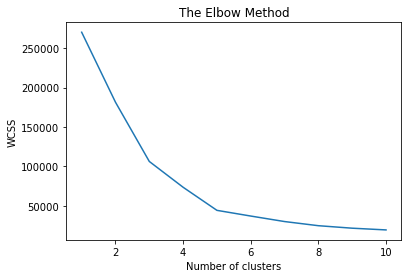

In [4]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

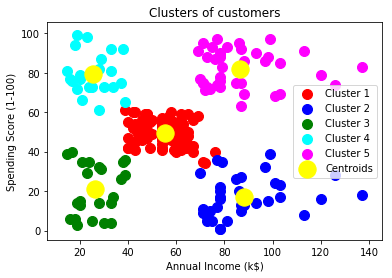

In [5]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Hierarchical Clustering

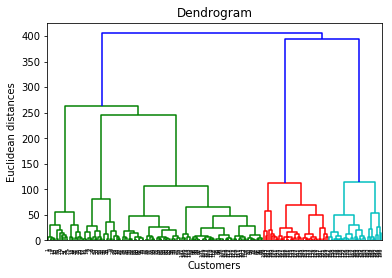

In [8]:
# Using the dendrogram to find the optimal number of clusters
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

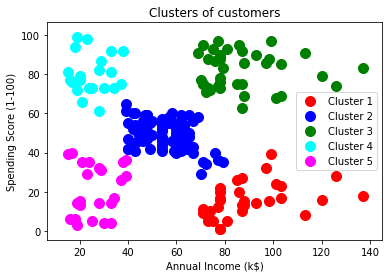

In [11]:
# Fitting Hierarchical Clustering to the dataset
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Text Cleaning Template

In [ ]:
# Importing the dataset
dataset = pd.read_csv('Reviews.tsv', delimiter = '\t', quoting = 3)

corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
    
# Creating the Bag of Words model
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

## Deep Learning Template

### Simple Dense Neural Network

In [ ]:
train_tr = pd.read_csv(os.path.abspath("C://train_tr.csv"),index_col=0)
valid_tr = pd.read_csv(os.path.abspath("C://valid_tr.csv"),index_col=0)
test_tr = pd.read_csv(os.path.abspath("C://test_tr.csv"),index_col=0)
train_valid = train_tr.append(pd.DataFrame(data = valid_tr), ignore_index=True)

# Function to get Numpy Data from Pandas
def get_npDat(DataFrame):
    DataFrame_val = DataFrame.values
    X = DataFrame_val[:,0:211].astype(float)
    Y = DataFrame_val[:,211]
    encoder  = LabelEncoder()
    encoder.fit(Y)
    enconder_Y = encoder.transform(Y)
    return X,enconder_Y

X_train, Y_train = get_npDat(train_tr)
X_valid, Y_valid = get_npDat(valid_tr)
X_test, Y_test = get_npDat(test_tr)

# Set checkpoint to save model weights with best performance, Or early stopping of fitting
filepath="weights.best.3.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
Es = EarlyStopping(monitor='val_loss',min_delta=0,patience=2,verbose=0, mode='auto')
callbacks_list = [checkpoint]#,Es]

#CREATE NETWORK ARCHITECTURE
model = Sequential()
model.add(Dense(150, input_dim=211, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(75, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# load weights
model.load_weights("weights.best.3.hdf5")
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
fit_nn = model.fit(X_train, Y_train, validation_data=(X_valid,Y_valid), epochs=200, \#validation_split=0.3,
          callbacks=callbacks_list,batch_size=35000,verbose=1)

# Multiclass Classification
# Add the output layer
model.add(Dense(2, activation='softmax'))
# Compile the model different activation if you want to
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Evaluate Model
scores = model.evaluate(X_tv, Y_tv)
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))

####----- PLOT MODEL PERFORMANCE HISTORY---####
# summarize history for accuracy
plt.plot(fit_nn.history['acc'])
plt.plot(fit_nn.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(fit_nn.history['loss'])
plt.plot(fit_nn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()


# Predicting the Test set results
# Label Prediction
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
confusion_matrix(y_test, y_pred)

# Probability Prediction
test_prediction = model.predict_proba(X_test,verbose=1)
# Get Decile Performance from Probability Prediction
def get_decile(data_tr,preds):
    DataEval = pd.DataFrame(data_tr['MoveIn'])
    DataEval = DataEval.assign(Scores = preds)
    DataEval.sort_values(by='Scores',axis=0,ascending=False,inplace=True)
    DataEval = DataEval.assign(DecIndex = list(range(1,len(DataEval)+1)))
    DataEval = DataEval.assign(Decile = np.ceil(DataEval.DecIndex/(len(DataEval)/10.0)))
    DataEval = DataEval.assign(MoveInNum = np.array([1 if( i == 'Yes') else 0 for i in DataEval.MoveIn]))
    DataGroup = DataEval.groupby('Decile').agg({
        'Scores':'mean',
        'MoveInNum':'sum'
    })
    DataGroup['NumCust'] = DataEval.groupby('Decile')['Decile'].count().values
    DataGroup['MeanMI'] = DataEval.groupby('Decile')['MoveInNum'].mean().values
    DataGroup['CumResRate'] = np.cumsum(DataGroup.MoveInNum.values)/np.cumsum(DataGroup.NumCust.values)
    DataGroup['CumLift'] = (DataGroup.MeanMI.values/np.sum(DataGroup.MoveInNum.values))*np.sum(DataGroup.NumCust.values)*100
    DataGroup['CumGain'] = np.cumsum(DataGroup.MoveInNum.values)/np.sum(DataGroup.MoveInNum.values)*100
    return DataEval,DataGroup

test_eval, test_dec = get_decile(data_tr=test_tr,preds=test_prediction)
test_dec

### Image Classification

In [ ]:
# Process and Create discrepancy in Image data
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

#------------CREATE NETWORK------------------#
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Convolution2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fit The Network
classifier.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = 2000)